In [36]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from plot_confusion_matrix import plot_confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from math import pi
import re
from tqdm import tqdm

,Level,Title,Text,Source,cleanedSource,Type,newLevel,cleanedText,SE_ratioRealSpellingErrors,SE_ratioSpellingErrors,...,SC-no_passives_per_sentence,SC-no_passives_per_clause,SC-zu_infinitive_per_clause,SC-zu_infinitive_per_sentence,SC-separated_verb_per_clause,SC-separated_verb_per_sentence,SC-av_inter_clause_per_clause,SC-av_inter_clause_per_sentence,SC-relative_clauses_to_dependent_clauses_ratio,SC-sein_haben_ratio
0,A1,Meine Familie,Zu meiner Familie gehören vier Personen. Die M...,https://german.net/reading/familie/,german.net,Reading,A,Zu meiner Familie gehören vier Personen. Die M...,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0,0.042017
1,A1,Maria und ihre Familie,Mein Name ist Maria. Ich bin 30 Jahre alt. Zu ...,https://german.net/reading/marias-familie/,german.net,Reading,A,Mein Name ist Maria. Ich bin 30 Jahre alt. Zu ...,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0,0.075581
2,A1,Ich bin Tom,Hallo! Ich bin Tom Maier. Ich bin 13 Jahre alt...,https://german.net/reading/tom/,german.net,Reading,A,Hallo! Ich bin Tom Maier. Ich bin 13 Jahre alt...,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0,0.093023
3,A1,Freundinnen,Ricarda ist 21 Jahre alt und wohnt in Lübeck. ...,https://german.net/reading/freundinnen/,german.net,Reading,A,Ricarda ist 21 Jahre alt und wohnt in Lübeck. ...,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0,0.034783
4,A1,Einkaufen im Supermarkt,Frau Meier geht heute in den Supermarkt. Ihr M...,https://german.net/reading/einkaufen/,german.net,Reading,A,Frau Meier geht heute in den Supermarkt. Ihr M...,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0,0.033210


611


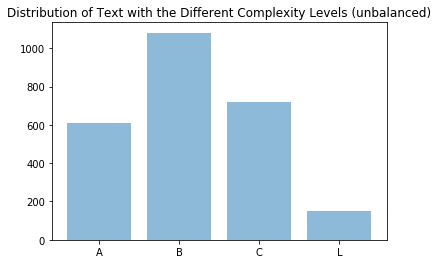

In [37]:
df=pd.read_csv(r"datasets/08_SyntaxComplexity/01_Preprocessing_df.csv", sep="|", lineterminator='\n')
display(df.head())

df_count= df['newLevel'].value_counts()
print(df_count[2])

plt.bar(df_count.index.values, df_count, align='center', alpha=0.5)
plt.title("Distribution of Text with the Different Complexity Levels (unbalanced)")
 
plt.show()

In [38]:
# Only use texts from Writing Tasks and no L1 level Text.
# Balance the Dataset
# Fill NaN with 0
df = df[df["newLevel"] != "L"]
df = df[df["Type"] == "Writing"]
level = df.groupby('newLevel')
df = level.apply(lambda x: x.sample(level.size().min()).reset_index(drop=True))
df = df.fillna(0)
print(len(df[df["newLevel"]=="A"]))

547


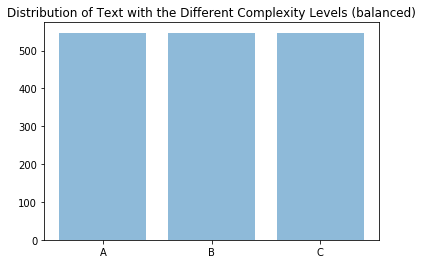

In [39]:
df_count= df['newLevel'].value_counts()

plt.bar(df_count.index.values, df_count, align='center', alpha=0.5)
plt.title("Distribution of Text with the Different Complexity Levels (balanced)")
 
plt.show()

In [46]:
import spacy
dfUnbalanced=pd.read_csv(r"datasets/08_SyntaxComplexity/01_Preprocessing_df.csv", sep="|", lineterminator='\n')

spacyNLP = spacy.load('de')
df_tokencount = dfUnbalanced[dfUnbalanced["Source"].apply(lambda x: x.startswith(""))]
df_tokencount = df_tokencount[df_tokencount["Type"] == "Reading"]
df_tokencount = df_tokencount[df_tokencount["newLevel"] == "B"]
total_token_count = 0
for text, source in tqdm(zip(df_tokencount["cleanedText"].tolist(), df_tokencount["Source"].tolist())):
    doc = spacyNLP(text)
    total_token_count+=len(doc)
    
print(total_token_count)
print(len(df_tokencount["cleanedText"].tolist()))

41it [00:02, 17.33it/s]

8642
41


In [32]:
# Rescale the feature values using MinMaxScaler
normalizedDF = df
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(normalizedDF._get_numeric_data()) 
normalizedDF[normalizedDF._get_numeric_data().columns] = scaled_values

normalizedDF.head()

Level  Title                                               Text  \
newLevel                                                                     
A        0    A2    0.0  Liebe Daniela, wie geht es Dir? Ich möchte mit...   
         1    A2    0.0  Stadt X, 27.02.2012. Lieber Silke, vielen Dank...   
         2     A    0.0  Ich plane eine Party für Freitag Abend . Eine ...   
         3     A    0.0  Ich habe viel zu tun . Am Montag , Mittwoch un...   
         4    A2    0.0  Wohnungsamt Stadt X 10.03.2012 Müller Meier Ma...   

                                          Source cleanedSource     Type  \
newLevel                                                                  
A        0  http://merlin-platform.eu/C_data.php        merlin  Writing   
         1  http://merlin-platform.eu/C_data.php        merlin  Writing   
         2             KanDeL_long_cohort2_v2097        KanDeL  Writing   
         3             KanDeL_long_cohort2_v2188        KanDeL  Writing   
         4  http://merlin-platform.eu/C_data.php        merlin  Writing   

           newLevel                                        cleanedText  \
newLevel                                                                 
A        0        A  Liebe Daniela, wie geht es Dir? Ich möchte mit...   
         1        A  Liebe Silke, vielen Dank für deine Brief. Ich ...   
         2        A  Ich plane eine Party für Freitag Abend . Eine ...   
         3        A  Ich habe viel zu tun . Am Montag , Mittwoch un...   
         4        A  Wohnungsamt Müller Meier Maria Bahnhofsstraße ...   

            SE_ratioRealSpellingErrors  SE_ratioSpellingErrors  \
newLevel                                                         
A        0                    0.106061                0.090909   
         1                    0.066667                0.057143   
         2                    0.208068                0.178344   
         3                    0.081871                0.070175   
         4                    0.160920                0.160920   

                   ...           SC-no_passives_per_sentence  \
newLevel           ...                                         
A        0         ...                                   0.0   
         1         ...                                   0.0   
         2         ...                                   0.0   
         3         ...                                   0.0   
         4         ...                                   0.0   

            SC-no_passives_per_clause  SC-zu_infinitive_per_clause  \
newLevel                                                             
A        0                        0.0                          0.0   
         1                        0.0                          0.0   
         2                        0.0                          0.0   
         3                        0.0                          0.0   
         4                        0.0                          0.0   

            SC-zu_infinitive_per_sentence SC-separated_verb_per_clause  \
newLevel                                                                 
A        0                            0.0                          0.0   
         1                            0.0                          0.0   
         2                            0.0                          0.0   
         3                            0.0                          0.0   
         4                            0.0                          0.0   

           SC-separated_verb_per_sentence SC-av_inter_clause_per_clause  \
newLevel                                                                  
A        0                            0.0                      0.750000   
         1                            0.0                      0.000000   
         2                            0.0                      0.000000   
         3                            0.0                      0.142857   
         4                            0.0      

In [33]:
#Select the features that should be used for the classifier
#This line has to be changed to use different feature subsets

features = np.array([columnName for columnName in df._get_numeric_data().columns if not columnName in ["Title"] and not columnName.startswith("RF")])
print(features)
print(len(features))

['SE_ratioRealSpellingErrors' 'SE_ratioSpellingErrors'
 'SE_ratioSpellingErrorsWithCorrection'
 'SE_ratioSpellingErrorsWithoutCorrection' 'SE_ratioUmlautSpellingErrors'
 'SE_ratioCapitalisationErrors' 'BF-average_sentence_length'
 'BF-average_syllable_word' 'BF-Flesch_Reading_Ease_Score'
 'BF-Flesch_Kincaid_readability' 'BF-percentag_hard_words' 'BF-fog'
 'BF-polysyllable_count' 'BF-smog' 'BF-average_character_per_word'
 'BF-text_length' 'LD-ttr' 'LD-root_ttr' 'LD-corrected_ttr' 'LD-log_ttr'
 'LD-uber_index' 'LD-yule_s_k' 'LD-mtld' 'LD-hdd' 'LV-lexical_density'
 'LV-lexical_word_variation' 'LV-noun_variation' 'LV-adj_variation'
 'LV-adv_variation' 'LV-modifier_variation' 'LV-verb_variation1'
 'LV-verb_variation2' 'LV-squared_verb_variation'
 'LV-corrected_verb_variation' 'LV-verb_token_ratio' 'LV-noun_token_ratio'
 'LV-verb_noun_token_ratio' 'FF-meanFreq' 'FF-medianFreq' 'FF-bin0'
 'FF-bin1' 'FF-bin2' 'FF-bin3' 'FF-bin4' 'FF-bin5' 'FF-bin6' 'FF-bin7'
 'FF-bin8' 'FF-bin9' 'FF-bin10' 'FF

190


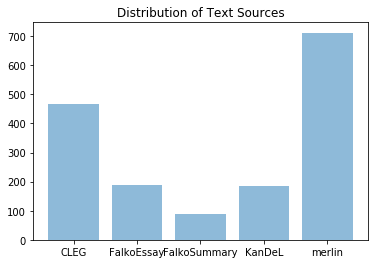

In [34]:
df_count= df['cleanedSource'].value_counts()
print(df_count[2])

plt.bar(df_count.index.values, df_count, align='center', alpha=0.5)
plt.title("Distribution of Text Sources")
 
plt.show()

No handles with labels found to put in legend.


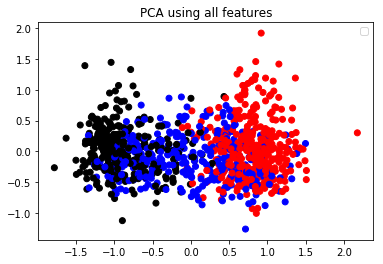

No handles with labels found to put in legend.


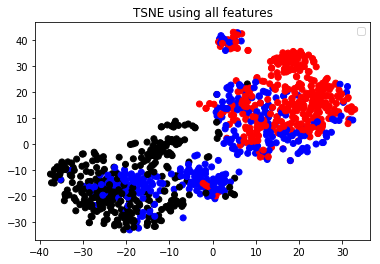

In [35]:
# PCS and TSNE 

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

df_sample = df.sample(1000)

X = df_sample[features]
y = df_sample["newLevel"].tolist()

color_map = {"A": (0, 0, 0), "B": (0, 0, 1), "C": (1, 0, 0)}
colors = [color_map[y] for y in y]

pca = PCA(n_components=2)
pcaDF = pca.fit_transform(X)
plt.scatter([data[0] for data in pcaDF], [data[1] for data in pcaDF], c = colors)
plt.title("PCA using all features")
plt.legend(loc='upper right')
plt.show()

tsne = TSNE(n_components=2)
tsneDF = tsne.fit_transform(X)
plt.scatter([data[0] for data in tsneDF], [data[1] for data in tsneDF], c = colors)
plt.title("TSNE using all features")
plt.legend(loc='upper right')
plt.show()

No handles with labels found to put in legend.


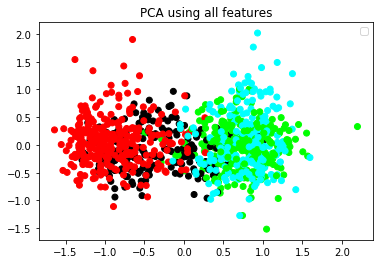

No handles with labels found to put in legend.


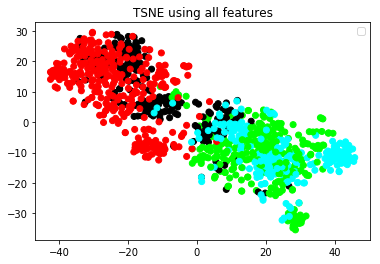

In [9]:
Adf = df_sample.loc[df['newLevel'] == "A"]
Bdf = df_sample.loc[df['newLevel'] == "B"]
Cdf = df_sample.loc[df['newLevel'] == "C"]

frames = [Bdf, Adf, Cdf]
X = pd.concat(frames)[features]
y = zip(Bdf["Source"].tolist() + Adf["Source"].tolist() + Cdf["Source"].tolist(), Bdf["Level"].tolist() +Adf["Level"].tolist()+Cdf["Level"].tolist())

def color_map(source, level):
    if source == "CLEG":
        return (0, 1, 0) #green
    else:
        if level.startswith("A"):
            return (1, 0, 0) # red
        elif level.startswith("C"):
            return (0, 1, 1) #türkis
        elif level.startswith("B"):
            return (0, 0, 0) #black
        else:
            print(level)
    
colors = [color_map(source, level) for source, level in y]


pca = PCA(n_components=2)
pcaDF = pca.fit_transform(X)
plt.scatter([data[0] for data in pcaDF], [data[1] for data in pcaDF], c = colors)
plt.title("PCA using all features")
plt.legend(loc='upper right')
plt.show()

tsne = TSNE(n_components=2)
tsneDF = tsne.fit_transform(X)
plt.scatter([data[0] for data in tsneDF], [data[1] for data in tsneDF], c = colors)
plt.title("TSNE using all features")
plt.legend(loc='upper right')
plt.show()

SE_ratioRealSpellingErrors


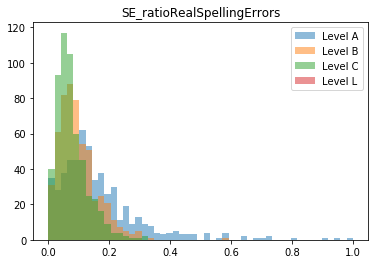

SE_ratioSpellingErrors


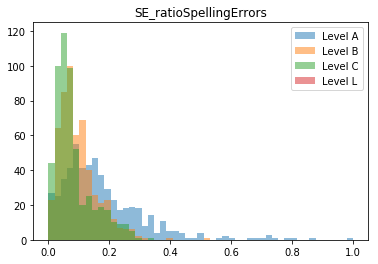

SE_ratioSpellingErrorsWithCorrection


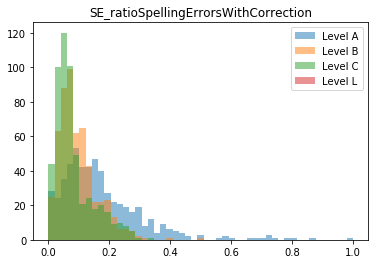

SE_ratioSpellingErrorsWithoutCorrection


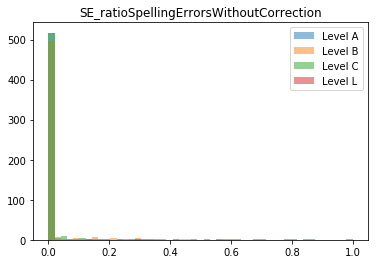

SE_ratioUmlautSpellingErrors


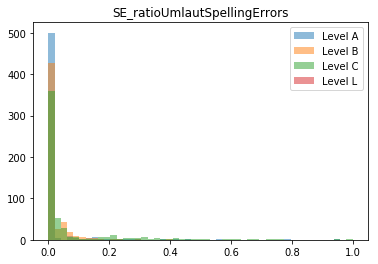

SE_ratioCapitalisationErrors


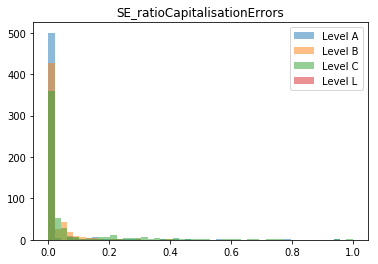

BF-average_sentence_length


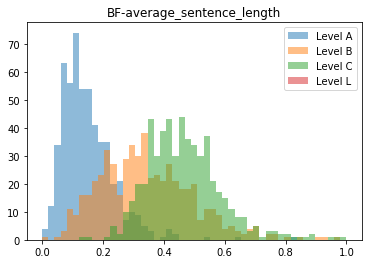

BF-average_syllable_word


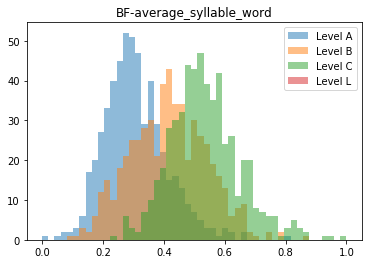

BF-Flesch_Reading_Ease_Score


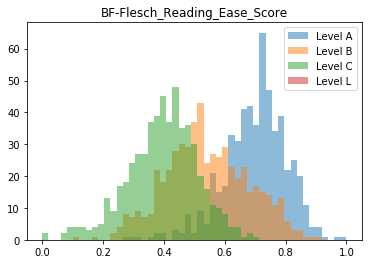

BF-Flesch_Kincaid_readability


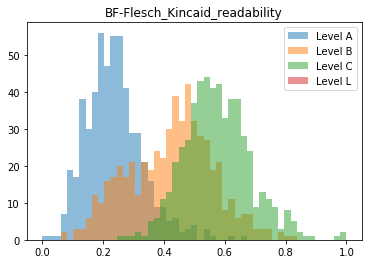

BF-percentag_hard_words


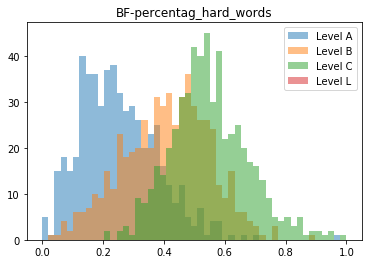

BF-fog


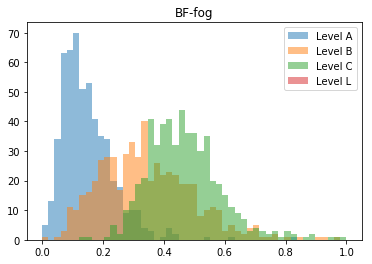

BF-polysyllable_count


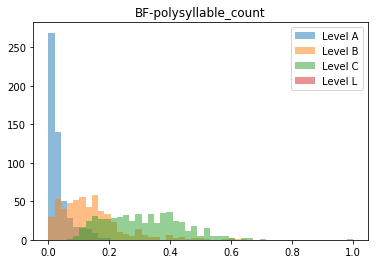

BF-smog


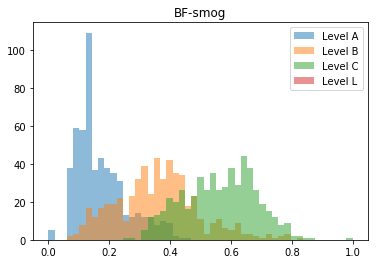

BF-average_character_per_word


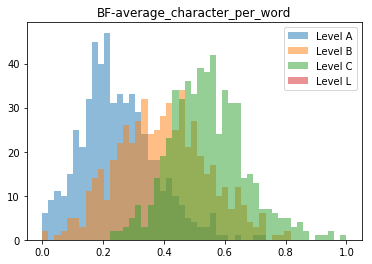

BF-text_length


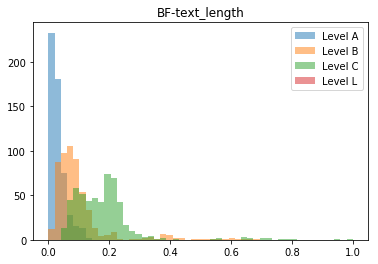

LD-ttr


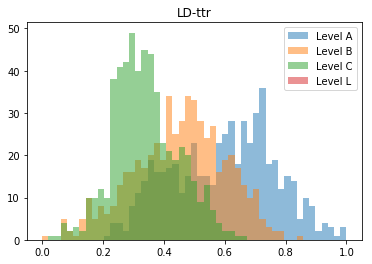

LD-root_ttr


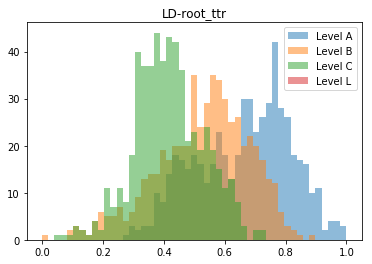

LD-corrected_ttr


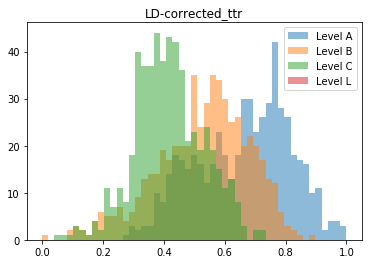

LD-log_ttr


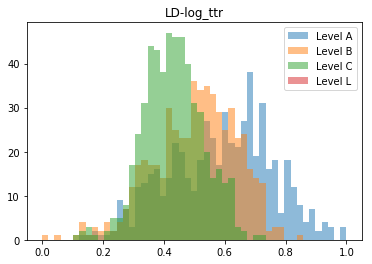

LD-uber_index


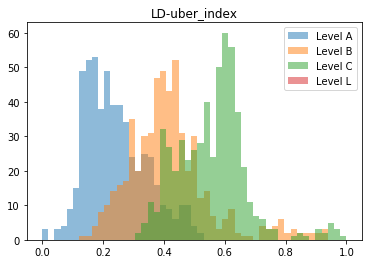

LD-yule_s_k


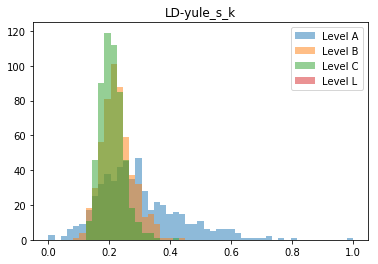

LD-mtld


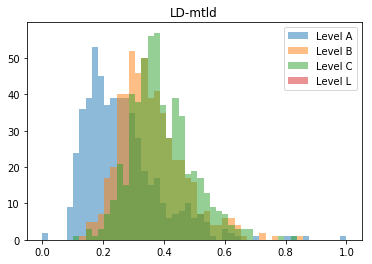

LD-hdd


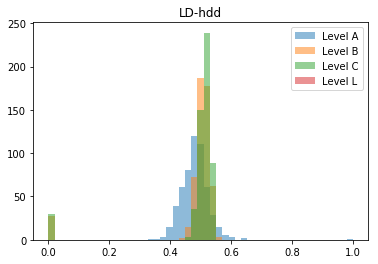

LV-lexical_density


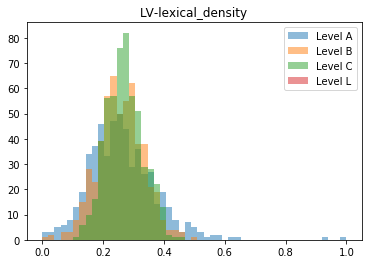

LV-lexical_word_variation


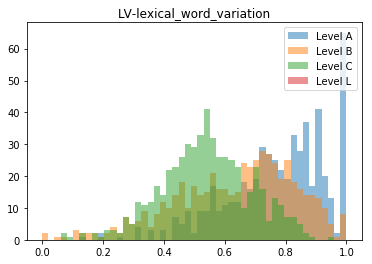

LV-noun_variation


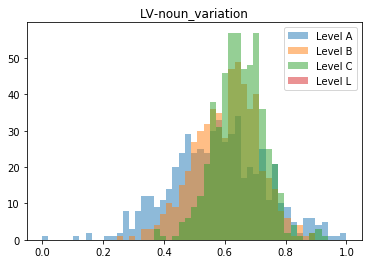

LV-adj_variation


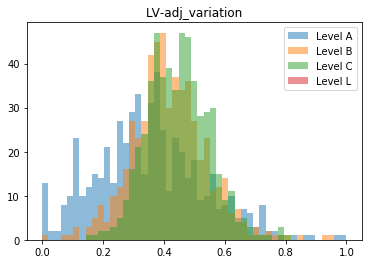

LV-adv_variation


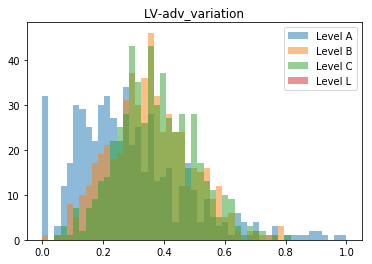

LV-modifier_variation


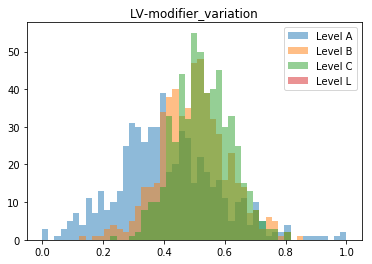

LV-verb_variation1


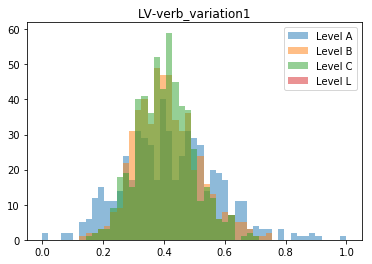

LV-verb_variation2


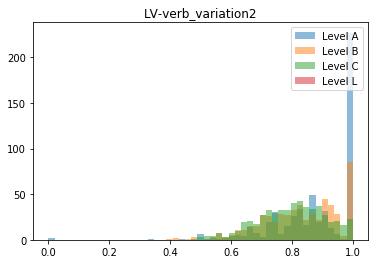

LV-squared_verb_variation


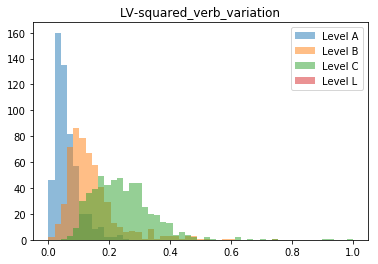

LV-corrected_verb_variation


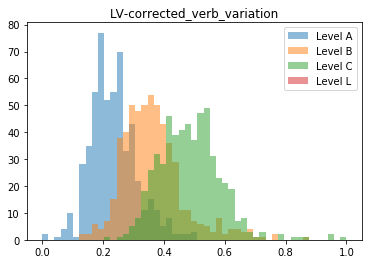

LV-verb_token_ratio


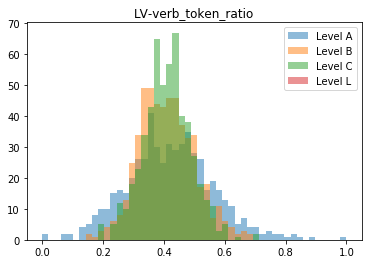

LV-noun_token_ratio


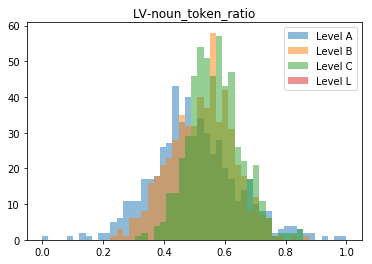

LV-verb_noun_token_ratio


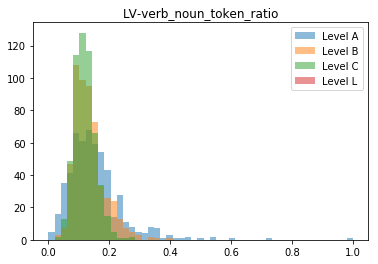

FF-meanFreq


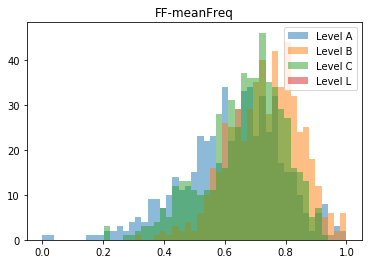

FF-medianFreq


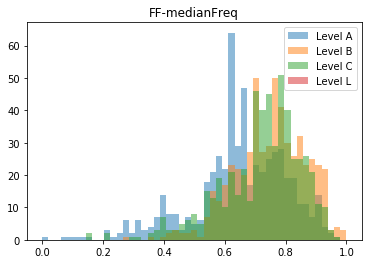

FF-bin0


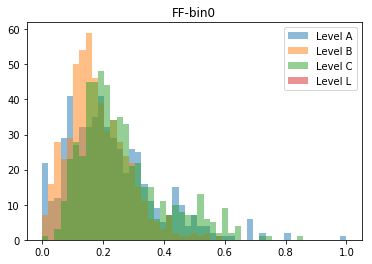

FF-bin1


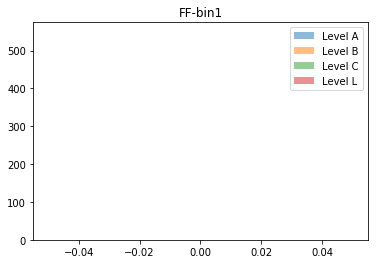

FF-bin2


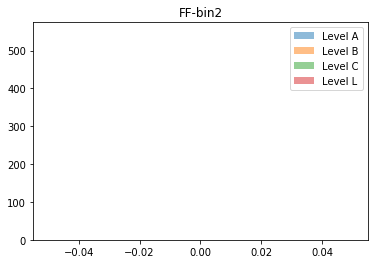

FF-bin3


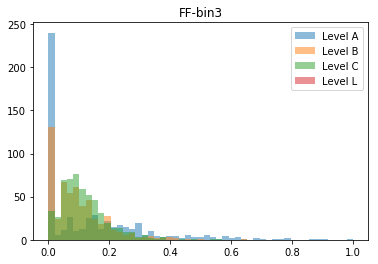

FF-bin4


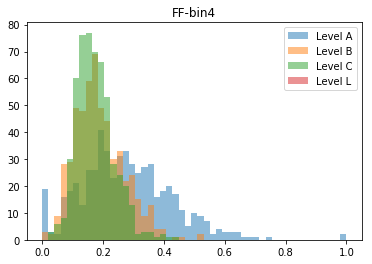

FF-bin5


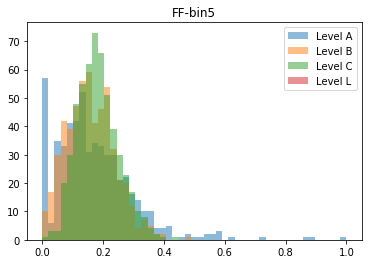

FF-bin6


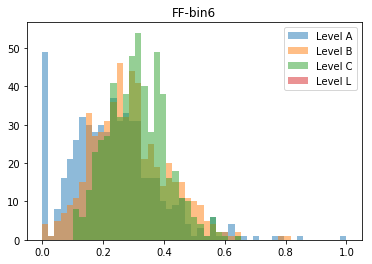

FF-bin7


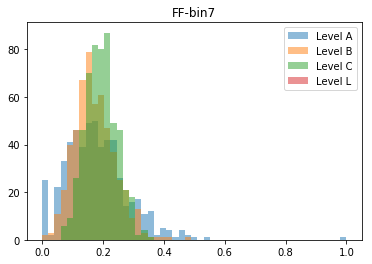

FF-bin8


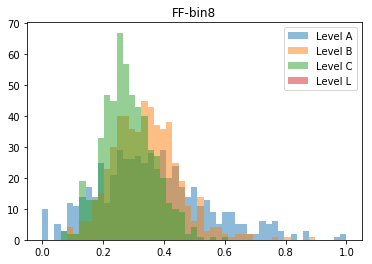

FF-bin9


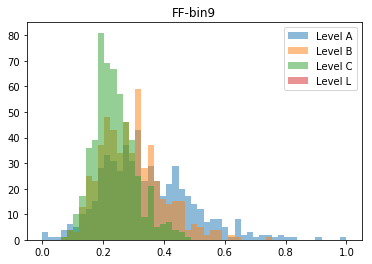

FF-bin10


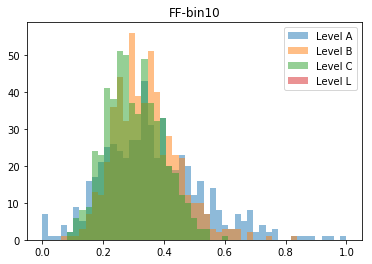

FF-bin11


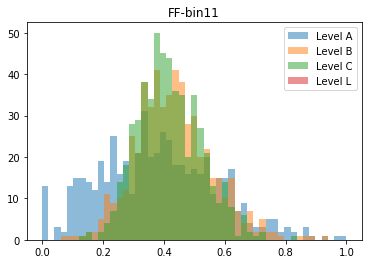

FF-bin12


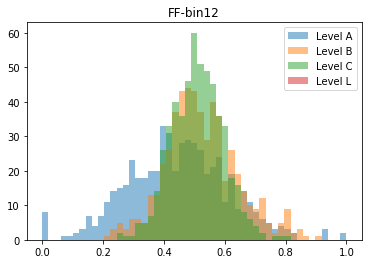

FF-bin13


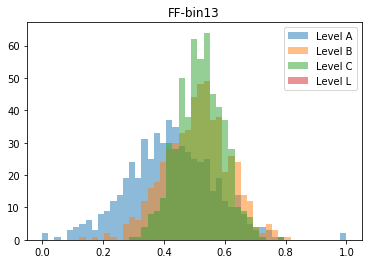

FF-bin14


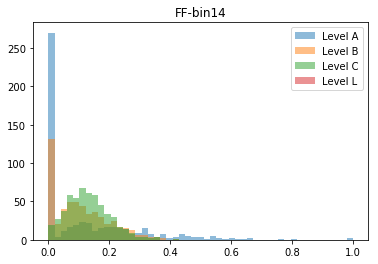

MO-1


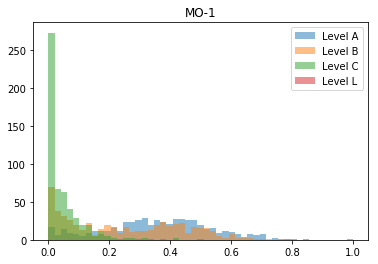

MO-2


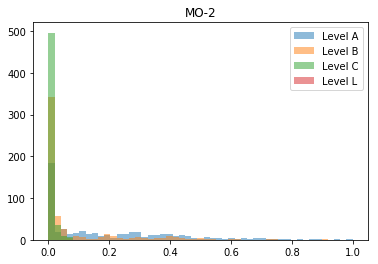

MO-3


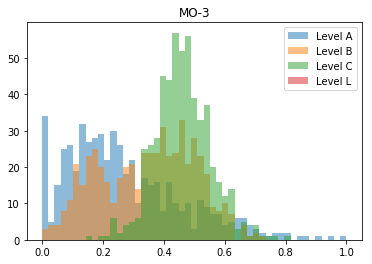

MO-ART


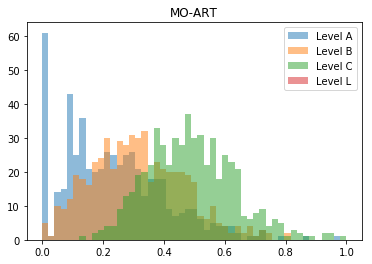

MO-Acc


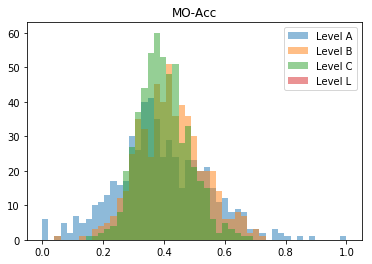

MO-Comp


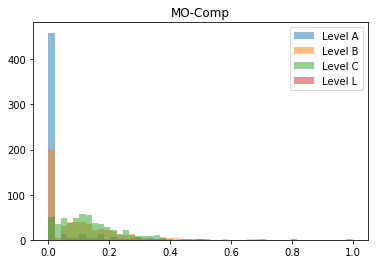

MO-Dat


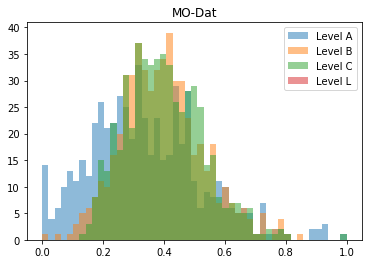

MO-Gen


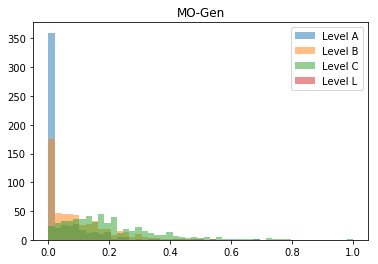

MO-Ind


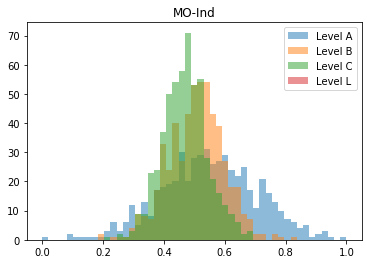

MO-Nom


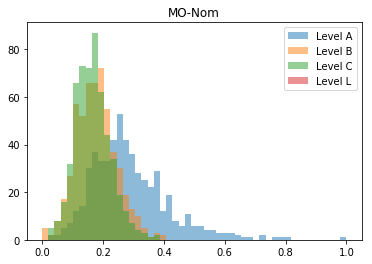

MO-Past


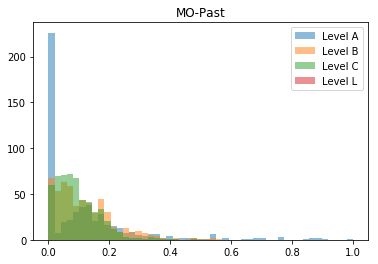

MO-Pl


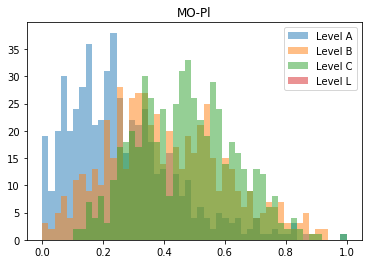

MO-Pres


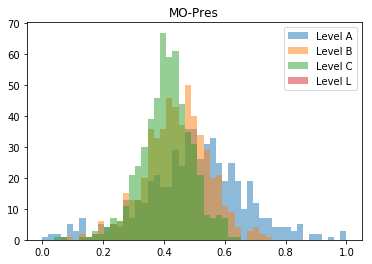

MO-Psp


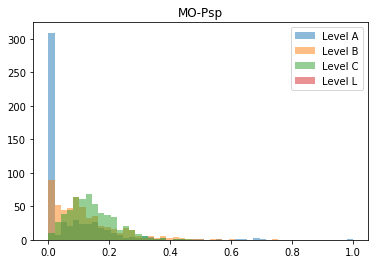

MO-Sg


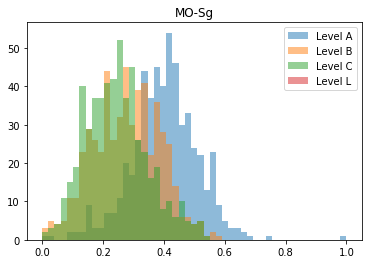

MO-Subj


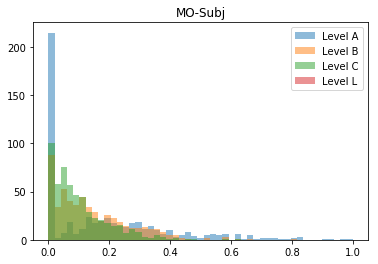

MO-Sup


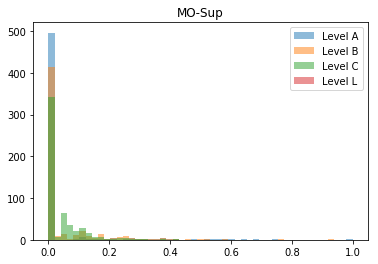

MO-TRUNC


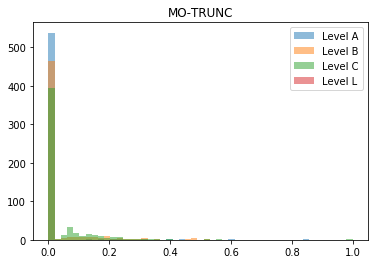

MO-VFIN


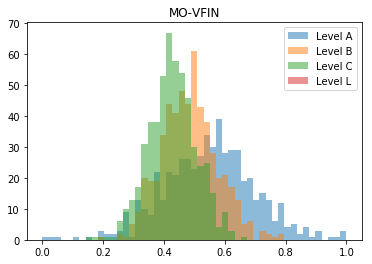

MO-VIMP


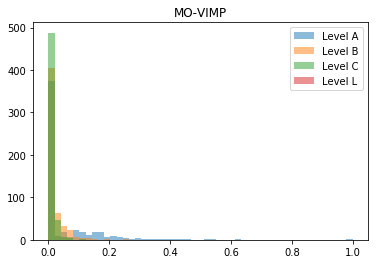

MO-VINF


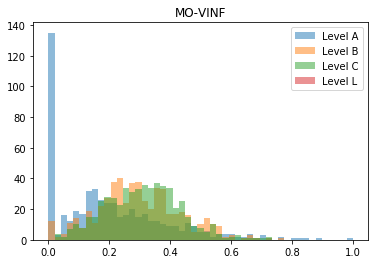

MO-VPP


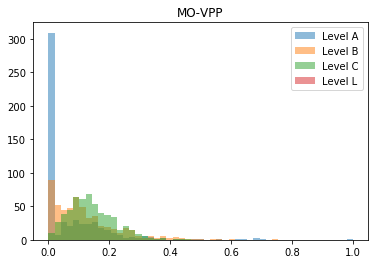

MO-inf2verbs


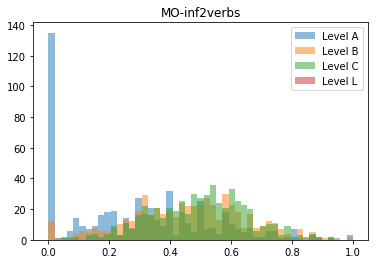

MO-part2verbs


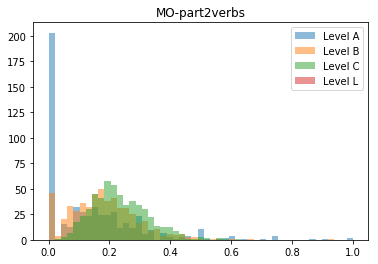

MO-imp2verbs


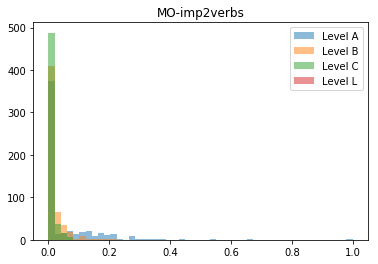

MO-1st2finverbs


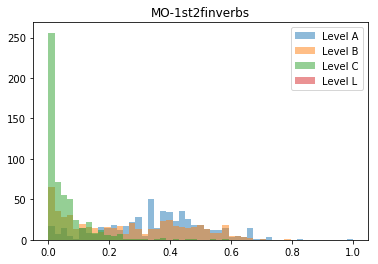

MO-2nd2finverbs


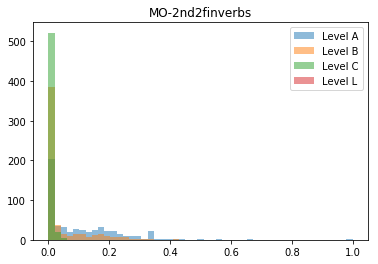

MO-3rd2finverbs


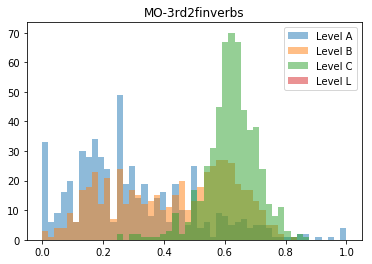

MO-subj2finverbs


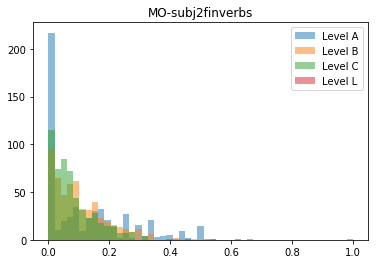

MO-finverbs2verbs


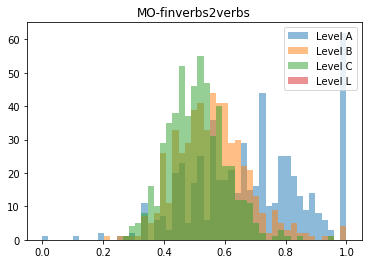

MO-modverbs2verbs


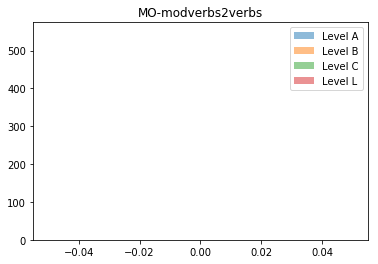

MO-auxverbs2verbs


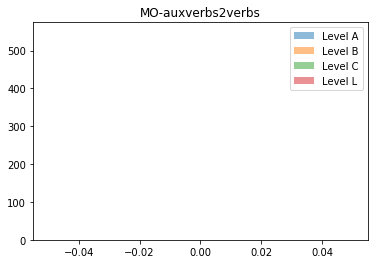

MO-verbspersent


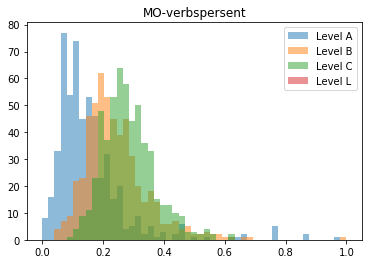

MO-nom2nouns


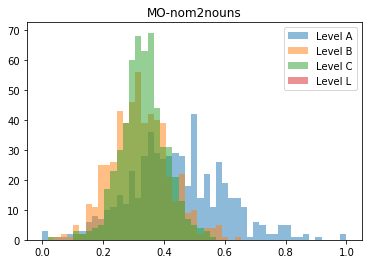

MO-gen2nouns


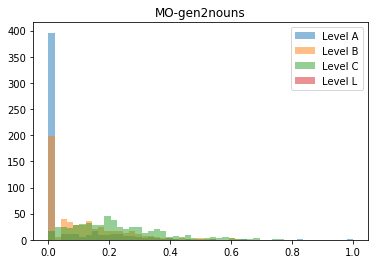

MO-dat2nouns


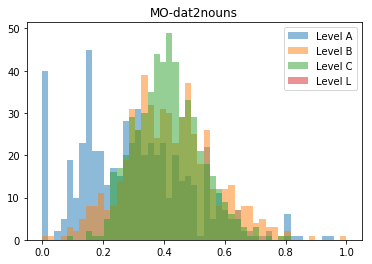

MO-acc2nouns


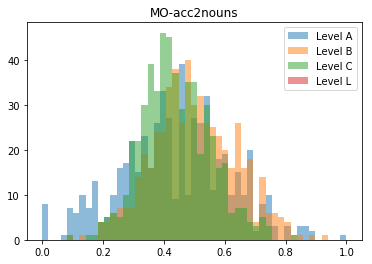

MO-keit2nouns


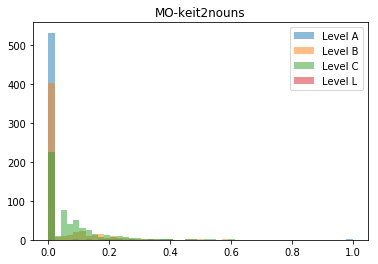

MO-ung2nouns


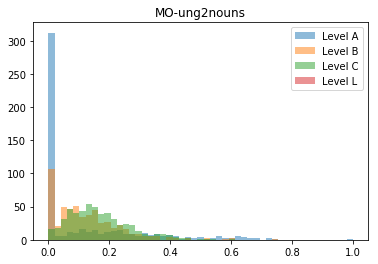

MO-werk2nouns


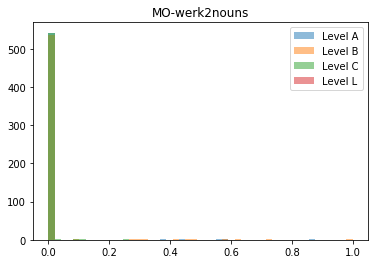

MO-compounds2nouns


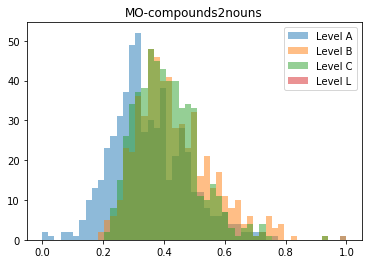

SD-max_no_words_head_dep


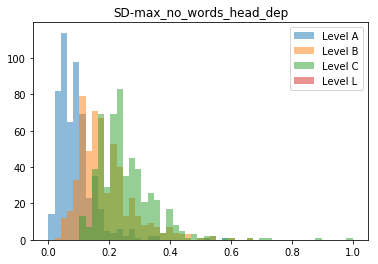

SD-avg_no_words_head_dep


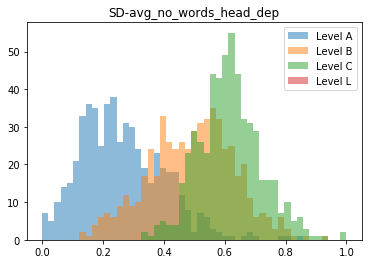

SD-avg_no_dep_verb_inc_mod


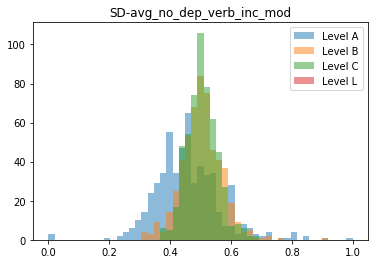

SD-avg_no_dep_noun_inc_mod


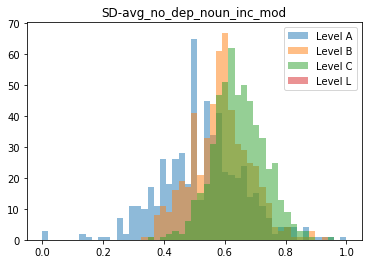

SD-avg_no_dep_verb_exc_mod


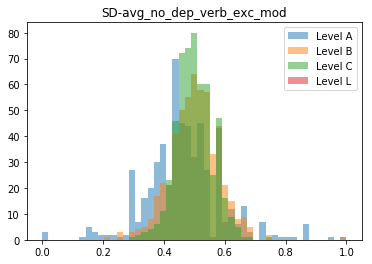

SD-avg_no_dep_noun_exc_mod


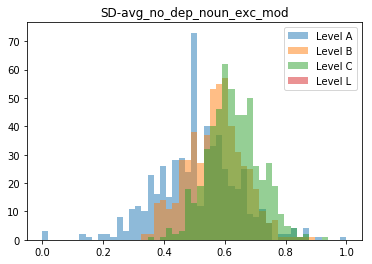

SC-av_clause_length


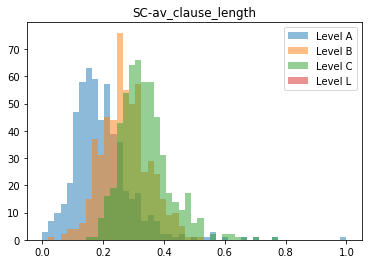

SC-max_clause_length


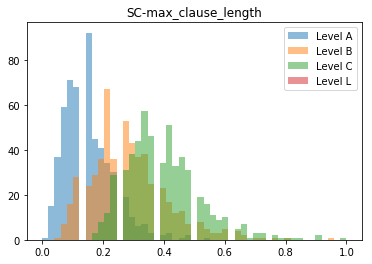

SC-av_num_clauses_per_sentence


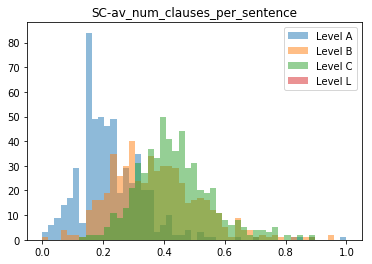

SC-av_num_dep_clauses_per_sentence


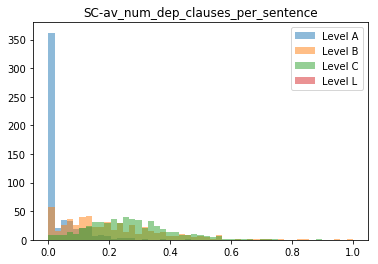

SC-av_num_dep_clauses_per_clause


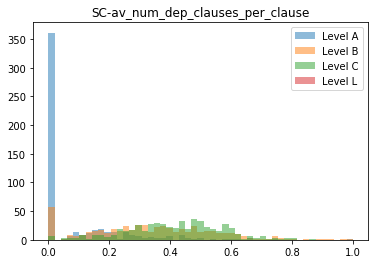

SC-av_coordinations_per_sentence


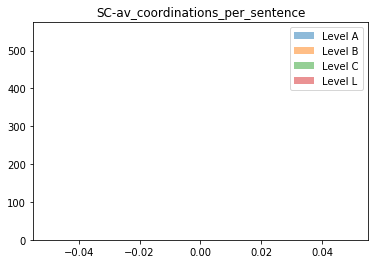

SC-av_coordinations_per_clause


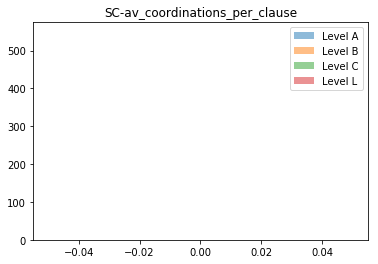

SC-av_num_nps_per_sentence


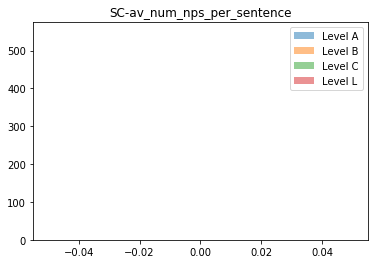

SC-av_num_vps_per_sentence


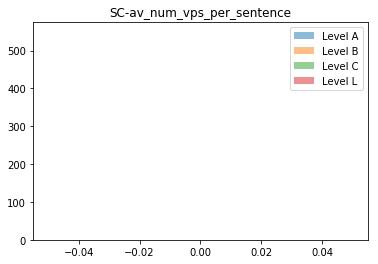

SC-av_num_vzs_per_sentence


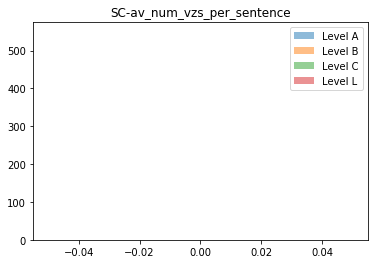

SC-av_num_pps_per_sentence


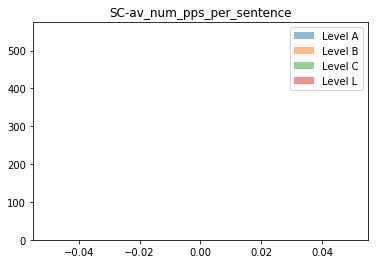

SC-av_num_nps_per_clause


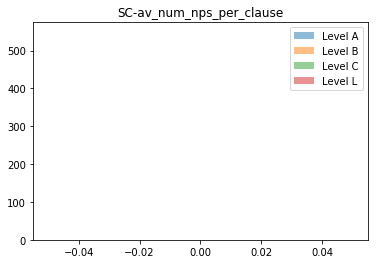

SC-av_num_vps_per_clause


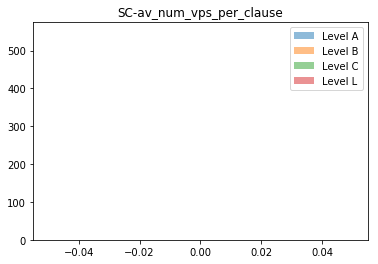

SC-av_num_vzs_per_clause


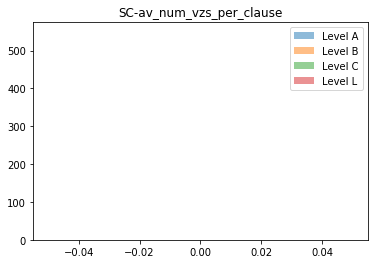

SC-av_num_pps_per_clause


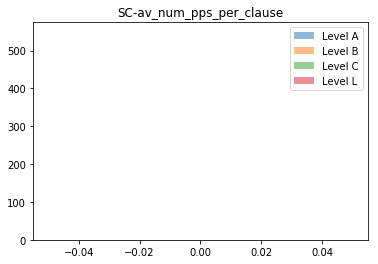

SC-av_non_terminals_per_word


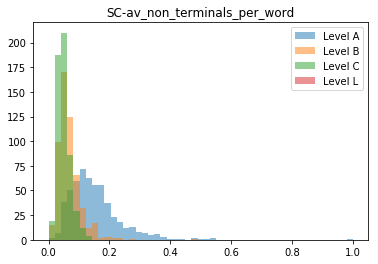

SC-av_non_terminals_per_sentence


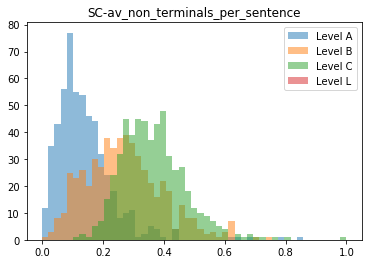

SC-no_passives


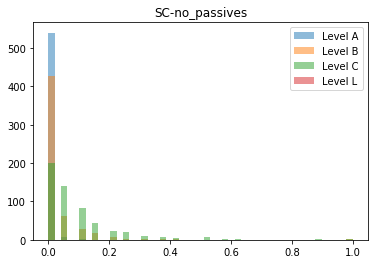

SC-no_passives_per_sentence


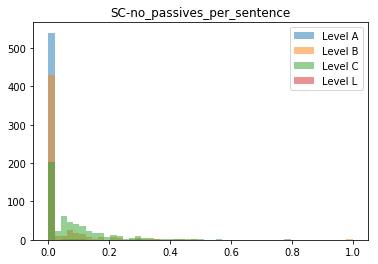

SC-no_passives_per_clause


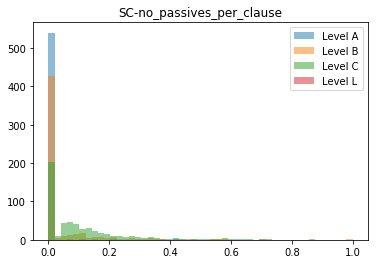

SC-zu_infinitive_per_clause


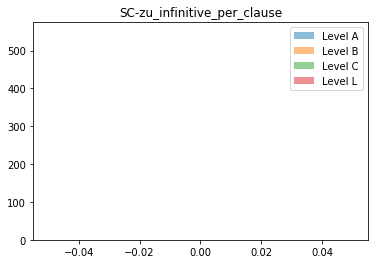

SC-zu_infinitive_per_sentence


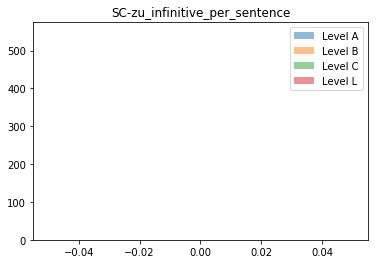

SC-separated_verb_per_clause


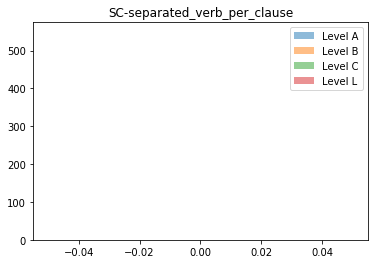

SC-separated_verb_per_sentence


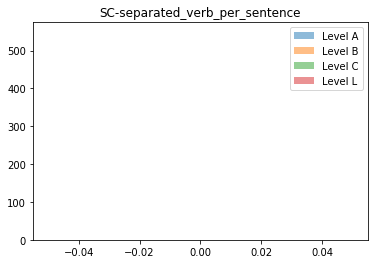

SC-av_inter_clause_per_clause


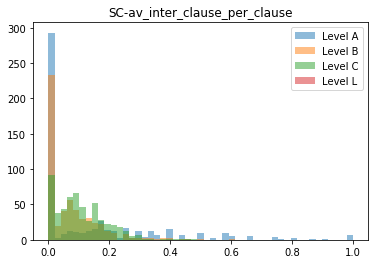

SC-av_inter_clause_per_sentence


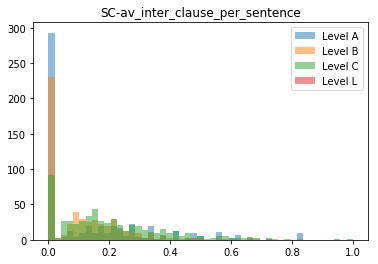

SC-relative_clauses_to_dependent_clauses_ratio


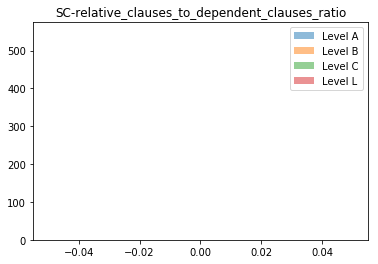

SC-sein_haben_ratio


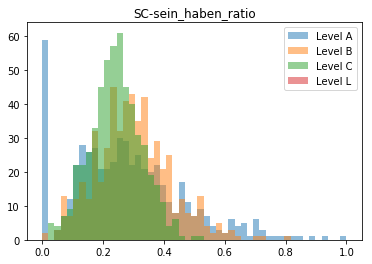

In [10]:
df = normalizedDF

for feature in features: 
    print(feature)
    a = df.loc[df['newLevel'] == "A"][feature]
    b = df.loc[df['newLevel'] == "B"][feature]
    c = df.loc[df['newLevel'] == "C"][feature]
    l = df.loc[df['newLevel'] == "L"][feature]

    bins = np.linspace(df[feature].min(), df[feature].max(), 50)

    plt.hist(a, bins, alpha=0.5, label='Level A')
    plt.hist(b, bins, alpha=0.5, label='Level B')
    plt.hist(c, bins, alpha=0.5, label='Level C')
    plt.hist(l, bins, alpha=0.5, label='Level L')
    plt.title(feature)
    
    plt.legend(loc='upper right')
    plt.show()

In [11]:
#import pandas.rpy2.common as com
import seaborn as sns
%matplotlib inline

def draw_correlation_matrix(df, features):
    # calculate the correlation matrix
    corr = df[features].corr()

    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # plot the heatmap
    sns.heatmap(corr, 
            vmin=-1, vmax=1, mask=mask,
            cmap=plt.get_cmap("RdBu"),
            xticklabels=corr.columns,
            yticklabels=corr.columns)

In [12]:
def drawSpiderweb(df, features, featureNames):
    N = len(features)
 
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1], featureNames, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.25, 0.5], ["0.25""0.5"], color="grey", size=7)
    plt.ylim(0,0.5)
 

    values=df.groupby(["newLevel"]).mean()[features].loc["A"].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Level A")
    ax.fill(angles, values, 'b', alpha=0.1)
 
    values=df.groupby(["newLevel"]).mean()[features].loc["B"].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Level B")
    ax.fill(angles, values, 'r', alpha=0.1)

    values=df.groupby(["newLevel"]).mean()[features].loc["C"].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Level C")
    ax.fill(angles, values, 'r', alpha=0.1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.title("Top 10 Features")
    plt.show()

def plot_coefficients(classifier, feature_names, top_features=20):
    #function that plots the important coefficient for each class in a classifier
    #
    #param classifier:     classifier used
    #param feature_names:  list of feature names
    #param top_features:   numer of features on the graph
    #
    #return:               one graph for each class
    
    for stars, coef in zip(["A", "B", "C"], [coefs.ravel() for coefs in classifier.coef_]):
        top_positive_coefficients = np.argsort(coef)[-top_features:]
        top_negative_coefficients = np.argsort(coef)[:top_features]
        top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
        plt.figure(figsize=(15, 1))
        colors = ["red" if c < 0 else "blue" for c in coef[top_coefficients]]
        plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
        plt.title("Top features for categorizing Level " + stars + " Text")
        feature_names = np.array(feature_names)
        plt.xticks(np.arange(0, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha="right")
        plt.show()


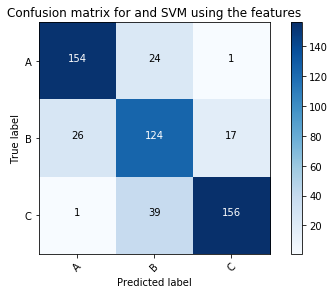

In [13]:
trainDF, testDF = train_test_split(df, test_size=0.33)

X_train = trainDF[features]
y_train = trainDF["newLevel"]

X_test = testDF[features]
y_test = testDF["newLevel"]

class_names = ["A", "B", "C"]

clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title=str('Confusion matrix for and SVM using the features'))

plt.show()

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

print("=== CrossValidation Accuracy ===")
clf = LinearSVC()
scores = cross_val_score(clf, df[features], df["newLevel"], cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

for k in [1, 5, 10, 20, 30, 40 , 50, 100]:
    print("=== CrossValidation with feature selection "+ str(k) + "===")
    clf = LinearSVC()
    kBest = SelectKBest(chi2, k=k)
    pipeline = Pipeline([('kBest', kBest), ('clf', clf)])
    scores = cross_val_score(pipeline, df[features], df["newLevel"], cv=10)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

=== CrossValidation Accuracy ===
Accuracy: 0.83 (+/- 0.04)
=== CrossValidation with feature selection 1===
Accuracy: 0.69 (+/- 0.05)
=== CrossValidation with feature selection 5===
Accuracy: 0.75 (+/- 0.05)
=== CrossValidation with feature selection 10===
Accuracy: 0.76 (+/- 0.06)
=== CrossValidation with feature selection 20===
Accuracy: 0.77 (+/- 0.06)
=== CrossValidation with feature selection 30===
Accuracy: 0.79 (+/- 0.05)
=== CrossValidation with feature selection 40===
Accuracy: 0.80 (+/- 0.05)
=== CrossValidation with feature selection 50===
Accuracy: 0.81 (+/- 0.06)
=== CrossValidation with feature selection 100===
Accuracy: 0.83 (+/- 0.03)


Optimal number of features : 129


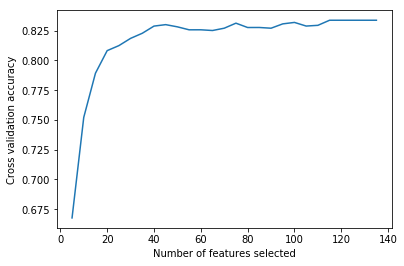

In [15]:
# RFE
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

X = df[features]
y = df["newLevel"]

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=5, cv=StratifiedKFold(10),
              scoring='accuracy')

rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation accuracy")
plt.plot(range(5, (len(rfecv.grid_scores_)*5 + 5), 5), rfecv.grid_scores_)
plt.show()

In [16]:
top50features = features[rfecv.get_support()]

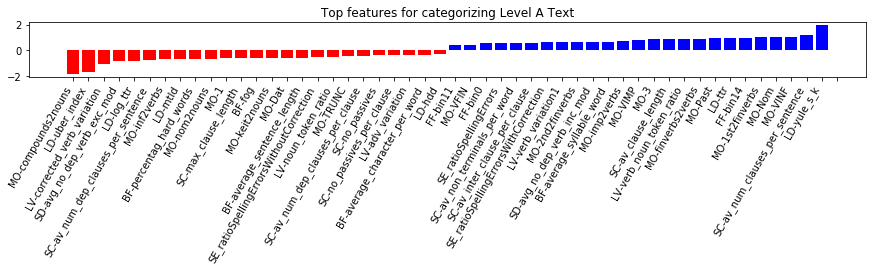

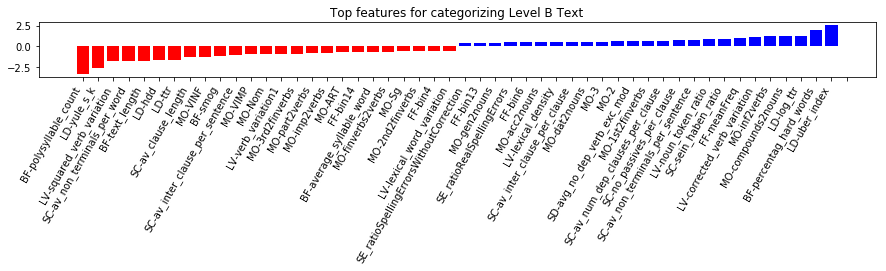

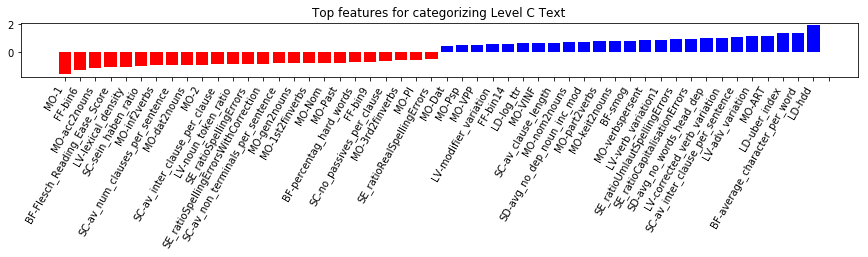

In [17]:
X = df[top50features]
y = df["newLevel"]

clf = LinearSVC()
clf.fit(X, y)

plot_coefficients(clf, top50features , top_features=25)

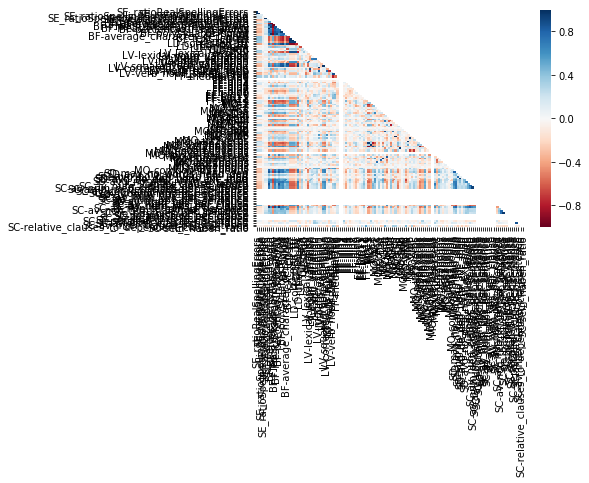

In [18]:
draw_correlation_matrix(df, top50features)

Optimal number of features : 102


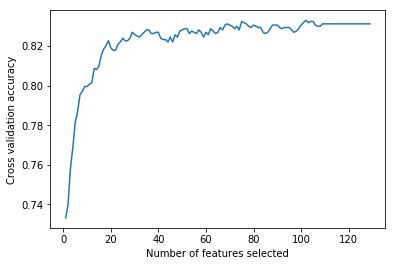

In [19]:
X = df[top50features]
y = df["newLevel"]

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')

rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation accuracy")
plt.plot(range(1, (len(rfecv.grid_scores_) + 1), 1), rfecv.grid_scores_)
plt.show()

In [20]:
from sklearn.feature_selection import RFE
X = df[top50features]
y = df["newLevel"]

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfe = RFE(svc, 1, step=1)

rfe.fit(X, y)
print(top50features[rfe.support_])
sortedTop40 = [x for _,x in sorted(zip(rfe.ranking_, top50features))][:40]
print(sortedTop40)

['BF-smog']
['BF-smog', 'MO-1', 'SD-avg_no_words_head_dep', 'LV-corrected_verb_variation', 'LD-hdd', 'MO-compounds2nouns', 'BF-average_character_per_word', 'LD-uber_index', 'LD-mtld', 'MO-ART', 'MO-Sg', 'LV-adv_variation', 'SE_ratioSpellingErrorsWithCorrection', 'MO-Past', 'FF-meanFreq', 'LV-verb_variation1', 'LD-yule_s_k', 'MO-nom2nouns', 'FF-bin6', 'MO-1st2finverbs', 'SE_ratioCapitalisationErrors', 'BF-fog', 'SC-av_num_clauses_per_sentence', 'SE_ratioSpellingErrors', 'BF-polysyllable_count', 'MO-keit2nouns', 'SC-av_num_dep_clauses_per_clause', 'MO-Nom', 'FF-bin0', 'SC-av_inter_clause_per_sentence', 'SD-avg_no_dep_noun_inc_mod', 'MO-Psp', 'MO-part2verbs', 'SC-max_clause_length', 'LV-verb_noun_token_ratio', 'SC-av_clause_length', 'SC-av_non_terminals_per_sentence', 'SE_ratioRealSpellingErrors', 'FF-bin14', 'FF-bin12']


/home/soeren/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 'newLevel' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
/home/soeren/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: 'newLevel' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
/home/soeren/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: 'newLevel' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version


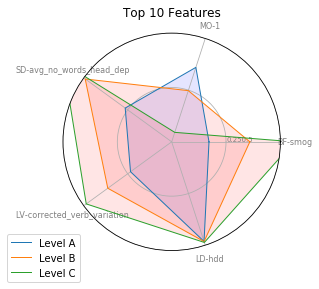

In [22]:
drawSpiderweb(df, sortedTop40[:5], sortedTop40[:5])

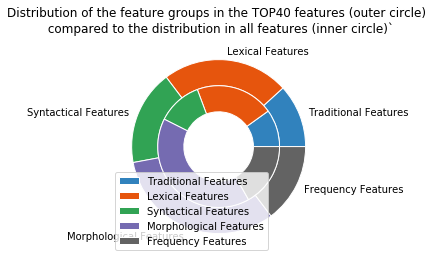

In [23]:
sortedTop40 = [x for _,x in sorted(zip(rfe.ranking_, top50features))][:40]
noBFinTop = len([featureName for featureName in sortedTop40 if featureName.startswith("BF")])
noLinTop = len([featureName for featureName in sortedTop40 if featureName.startswith("L")])
noSinTop = len([featureName for featureName in sortedTop40 if featureName.startswith("SE") or featureName.startswith("SD")])
noMOinTop = len([featureName for featureName in sortedTop40 if featureName.startswith("MO")])
noFFinTop = len([featureName for featureName in sortedTop40 if featureName.startswith("FF")])

noBFinAll = len([featureName for featureName in features if featureName.startswith("BF")])
noLinAll = len([featureName for featureName in features if featureName.startswith("L")])
noSinAll = len([featureName for featureName in features if featureName.startswith("SE") or featureName.startswith("SD")])
noMOinAll = len([featureName for featureName in features if featureName.startswith("MO")])
noFFinAll = len([featureName for featureName in features if featureName.startswith("FF")])


fig, ax = plt.subplots()

size = 0.3
vals = np.array([noBFinTop, noLinTop, noSinTop, noMOinTop, noFFinTop])
vals2 = np.array([noBFinAll, noLinAll, noSinAll, noMOinAll, noFFinAll])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(5)*4)
inner_colors = cmap(np.arange(5)*4)

ax.pie(vals, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=["Traditional Features", "Lexical Features", "Syntactical Features", "Morphological Features", "Frequency Features"])

ax.pie(vals2, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Distribution of the feature groups in the TOP40 features (outer circle) \n compared to the distribution in all features (inner circle)`')
ax.legend()
plt.show()